# Indiviual Segmentation

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage as ndi
from sklearn.cluster import MeanShift
from skimage.segmentation import watershed
from skimage.feature import peak_local_max

In [2]:
cv2.__version__

'3.4.2'

## Pre-define Function

In [3]:
def histogram(img):
    # if gray scale image
    if len(img.shape) == 2:
        plt.hist(img.ravel(),256,[0,256])
        plt.show()

    # if rgb
    else:
        color = ('r','g','b')
        for i,col in enumerate(color):
            histr = cv2.calcHist([img],[i],None,[256],[0,256])
            plt.plot(histr,color = col)
            plt.xlim([0,256])
        plt.show()


def show_gray(img):
    plt.axis('off')
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.show()


def show_rgb(img):
    plt.axis('off')
    plt.imshow(img)
    plt.show()

## Loading image

Original shape: (1158, 1647)


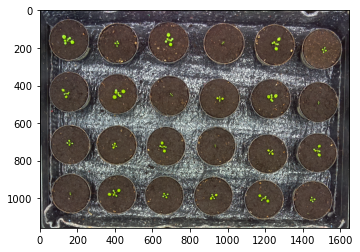

In [4]:
img = cv2.imread('../Plant_Phenotyping_Datasets/Tray/Ara2013-RPi/ara2013_tray01_rgb.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('Original shape:', img.shape[:2])
# img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_AREA)
plt.imshow(img)

## RGB segementation

In [12]:
def rgb_segment(img, rate=0.5):
    r, g, b = cv2.split(img)

    img_temp = cv2.add(cv2.subtract(g, r), cv2.subtract(g, b))
    img_temp = cv2.add(img_temp, img_temp)
    img_out = cv2.add(cv2.subtract(img_temp, r), cv2.subtract(img_temp, b))

    threshold = (np.max(img_out)+np.min(img_out)) * rate
    ret, mask = cv2.threshold(img_out, threshold, 255, cv2.THRESH_BINARY)

    mask = cv2.bitwise_not(mask)
    img_masked = cv2.bitwise_and(img, img, mask=mask)
    img_out = cv2.subtract(img, img_masked)

    return img_out

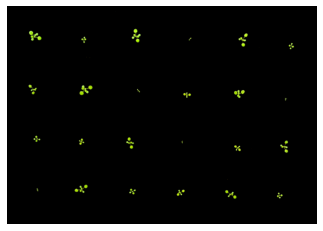

In [13]:
img_rgb = rgb_segment(img)
show_rgb(img_rgb)

## HSV segmentation

In [14]:
def hsv_segment(img, low_color=(40, 43, 35), high_color = (77, 255, 255)):
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    mask_img = cv2.inRange(img_hsv, low_color, high_color)

    img_neg = cv2.bitwise_and(img, img, mask=cv2.bitwise_not(mask_img))
    img_out = cv2.subtract(img, img_neg)

    return img_out

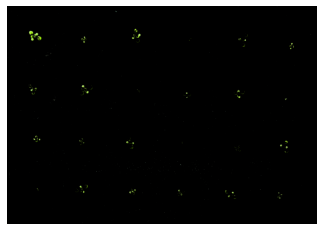

In [15]:
img_hsv = hsv_segment(img)
show_rgb(img_hsv)